<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 2 - Regressão Linear e Regressão Logística**

---

# Fundamento da Regressão Linear e Logística

---

O modelo linear é uma modelo que utiliza commbinações lineares das características da base de dados. Este por sua vez é definindo como [1,2]:
$$\hat{f}(\mathbf{x},\mathbf{w})=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n  $$
no qual $\hat{f}$ é a função aproximadora do método, $n$ o número de características, $w = (w_1 , ..., w_n )$ o vetor
com os coeficientes (ou pesos dos atributos) e $w_0$ é o termo escalar.

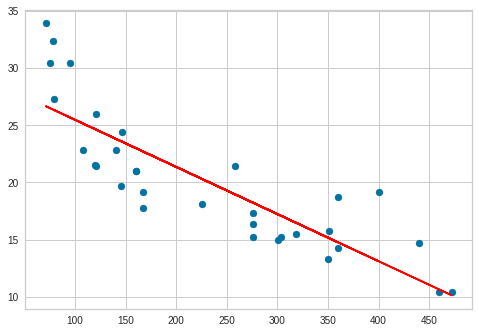


Existem diversos modelos lineares distintos, cada qual com sua especificidade e parâmetro distinto. Consultar [Linear Models](<https://scikit-learn.org/stable/modules/linear_model.html>) [2].

A qualidade de um estimador em fazer previsões é mediada por uma função de custo, que avalia o quão bem uma estimativa se aproxima do esperado [3,4]. A função
de custo é usada para aprimorar o modelo, que tende a minimizá-la [3]. 

Por mais que cada algoritmo possa possuir uma função de custo, em problemas de regressão geralmente ela está associada ao erro quadrático médio, representado abaixo [4]:
$$ MSE\left ( \hat{f} \right ) = \frac{1}{n} \sum_{i=1}^{n}\left ( y_i - \hat{f}(\mathbf{x}_i) \right )^2$$

no qual $n$ é o número de entradas do conjunto avaliado, $y_i$ é o valor real e $\hat{f}(\mathbf{x}_i)$ o valor previsto pelo modelo.

O $MSE$ está vinculado com o $RSME$, que é a medida de desempenho típica em problemas de regressão [3]. O $RSME$ é para quantificar os erros de um modelo de ML em suas previsões, dando um peso maior aos
grandes erros [1]. 
$$RMSE(\hat{f})=\sqrt{MSE(\hat{f})} $$

Outra medida de desempenho empregada nesta projeto é o coeficiente de determinação $R^2$, que representa a proporção de variância explicada pelas variáveis[3,4]. Assim, o $R^2$ explica o quão bem as amostras nunca vistas pelos modelos serão previstas por ele. A expressão abaixo representa como o $R^2$ é calculado normalmente:
$$R^{2}\left ( y, \hat{f} \right ) = 1 - \frac{\sum_{i=1}^{n}\left ( y_i - \hat{f}\left ( \mathbf{x}_i \right ) \right )^2}{\sum_{i=1}^{n}\left ( y_i - \overline{y} \right )^2}$$

no qual $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.

Já na regressão logística o modelo calcula a soma ponderada das características de entrada e soma-os a um termo olarizador ($w_0$) [5]. Esta função calcula a probabilidade em formato de uma função logística. Matematicamente, este modelo é descrito por [1]:
$$ \hat{f}(\mathbf{x},\mathbf{w}) = \sigma (\mathbf{x}.\mathbf{w})$$

sendo $\mathbf{w}.\mathbf{x}$ é o produto escalar
entre o o vetor de pesos e de características e $\sigma$ a função logística descrita por $\sigma(x) = \frac{1}{1+e^{-x}}$.

![img](https://static.wixstatic.com/media/7a7018_4481acc52e2d425bb21c433ae0dd4cd3~mv2.png/v1/fit/w_962%2Ch_434%2Cal_c/file.png)

Diferente dos modelos de regressão comum, a Reg. Logística é utilizada como um classificador. Identificando ou não a probabilidade de determinado valor pertencer a uma classe. 
No caso de problemas de classificação, onde é necessário associar um conjunto de dados a um rótulo específico, não podemos utilizar as métricas usuais de regeessão, pois não são valores numéricos e classes. Para isso, utilizamos a Matriz de Confusão, que associa os valores que foram encontrados de maneira correta ou não.


![Matriz de confusão](https://miro.medium.com/max/938/1*s7VB26Cfo1LdVZcLou-e0g.png)

**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Linear Models**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/linear_model.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Regressão Linear - Preço de casas em Boston

In [44]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


# Normalmente as estruturas a serem analisadas estão em formato CSV, EXCEL - Estes casos são mais fáceis de
# lidar e será mostrado seus procedimentos posteriormente.
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [45]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [46]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
dataset.get('data')

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [48]:
# df -> DataFrame
df = pd.DataFrame(dataset.get('data'))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
# Nomear as colunas do Dataframde
df.columns = dataset.get('feature_names')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
dataset.get('target')[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [51]:
#Adicionar uma coluna ao Dataframe
df['target'] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
# Separar os valores de atributo e alvo

X = df[['AGE']] # Exemplificando uma regressão linear simples
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [53]:
# Chamar a função do Modelo

LinReg = LinearRegression()
print(LinReg)
print(type(LinReg))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<class 'sklearn.linear_model._base.LinearRegression'>


In [54]:
# Treinar o modelo

LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Predizer os valores de teste

y_pred = LinReg.predict(X_test)
print(y_pred)

[18.2482516  25.84623407 18.8148808  28.61499039 17.99069287 30.09595308
 18.93078223 22.56236029 27.12114977 26.21969422 22.48509267 18.94366016
 24.79024328 20.03828476 29.86415022 17.99069287 20.86247269 19.83223778
 20.96549618 19.78072603 19.18834096 20.70793745 19.22697477 18.96941604
 18.26112954 18.13235017 19.12395127 22.24041188 25.9621355  24.90614471
 24.66146392 21.23593284 25.4341401  19.43302175 18.14522811 18.63458969
 28.61499039 24.76448741 29.7868826  18.89214842 22.8843087  19.47165556
 26.63178819 24.97053439 20.17994206 21.8927076  19.14970715 25.47277391
 24.46829487 25.40838423 23.25776885 24.05620091 17.99069287 19.90950539
 18.31264128 17.99069287 27.14690564 26.07803692 18.1065943  20.15418619
 19.72921428 28.6536242  28.89830499 21.80256204 24.10771266 19.67770254
 18.13235017 19.62619079 26.72193374 19.39438794 25.65306502 26.15530454
 17.99069287 28.48621103 23.19337917 29.72249292 22.34343537 28.11275087
 18.48005445 25.27960487 18.59595588 20.99125205 17

In [56]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 7.127207177203957
RMSE: 111.0418861651879
R²: 0.00022837417741339294


In [57]:
y_pred_total = LinReg.predict(X)

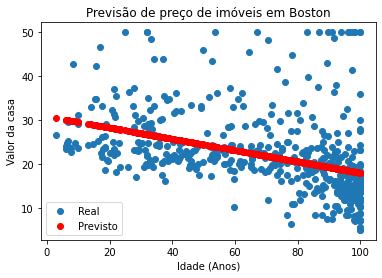

In [58]:
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


In [59]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

MSE: 3.457336190136741
RMSE: 22.13942918209141
R²: 0.7485430181395203


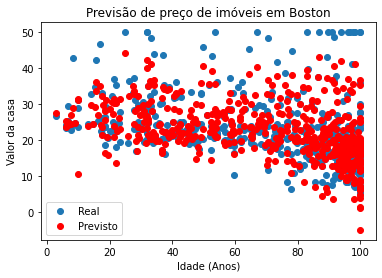

In [60]:
# Chamar a função do Modelo

LinReg = LinearRegression()

# Treinar o modelo

LinReg.fit(X_train,y_train)


# Preizer os valores de teste

y_pred = LinReg.predict(X_test)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

y_pred_total = LinReg.predict(X)
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()




# Regressão Linear - Qualidade do Vinho

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
'''Sobre o dataset: Utilizando parâmetros quantitativos como pH, concentração de álcool, entre outros. Fez-se um
Vamos analisar esse dataset que correlaciona esses dados, e vamos criar uma modelo para mediar a 
qualidade do vinho.'''

df = pd.read_csv('https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [65]:
#Divisão do dataset em Atributos e Resultado
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
                'residual sugar', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'density', 'pH',
                'sulphates','alcohol']
X = df[feature_cols]
y = df['quality']


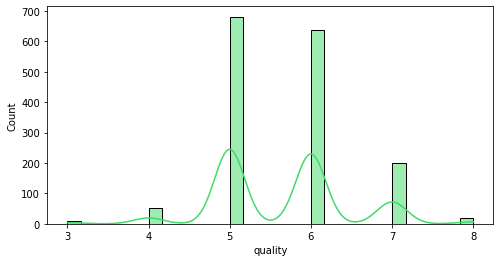

In [66]:
# Plotagem do histograma de qualidade

plt.figure(figsize=(8,4))
plt.tight_layout()
sns.histplot(df['quality'],kde=True,color="#40DA68")

plt.show()

In [67]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinamento do Dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train);
y_pred = regressor.predict(X_test)

In [68]:
# Plotagem da influência de cada variável em relação a qualidade do vinho (coeficiente angular)
# Nota: Para cada uma unidada de mudança no atributo, haverá uma mudança na qualidade do vinho de 
# acordo com o coeficiente. Por exemplo, se mudar 1 unidade de densidade, a qualidade do vinho 
# irá mudar -31.5166.

coeff_df = pd.DataFrame(regressor.coef_, feature_cols, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [69]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 0.46963309286611105
RMSE: 0.3844711978201246
R²: 0.32838876395802175


In [70]:
# Calcular as métricas do modelo

y_pred = y_pred.round()
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 0.396875
RMSE: 0.453125
R²: 0.20846127601501196


# Regressão Logística - Candidatos a Eleição

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [72]:
'''Sobre o dataset: Dados fictícios criados para exemplificar o gasto de políticos durante a eleição. Como variável de saída está
   situação se estes foram eleitos ou não.'''

df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/eleicao.csv")
df.head()

,CANDIDATO;SITUACAO;DESPESAS
0,George Turner;0;10
1,Victor Johnson;0;100
2,Jerry Perry;1;1600
3,Shirley Cook;1;1500
4,Carolyn Bailey;1;3300


In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/eleicao.csv",sep=";")
df.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CANDIDATO  47 non-null     object
 1   SITUACAO   47 non-null     int64 
 2   DESPESAS   47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


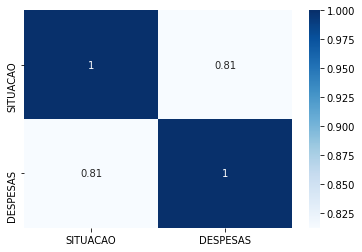

In [75]:
# Visualização da correlação entre as variáveis

sns.heatmap(df.corr(),cmap='Blues',annot=True)

plt.show()

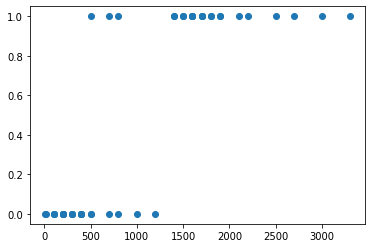

In [76]:
plt.scatter(df.DESPESAS, df.SITUACAO)
plt.show()

In [80]:
X = df[['DESPESAS']]

In [81]:
y = df['SITUACAO']

X_train, X_test, y_train, y_teste = train_test_split(X,y,test_size=0.1)

In [82]:
modelo = LogisticRegression()
modelo.fit(X_train,y_train)
print(modelo.coef_)
print(modelo.intercept_)

[[0.00482143]]
[-4.48128089]


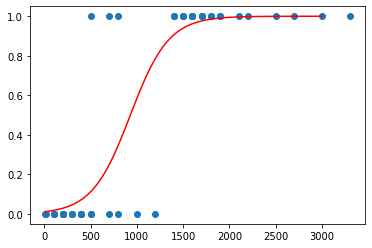

In [83]:
#@title
def model(x):
    return 1/ (1+np.exp(-x))
plt.scatter(X,y)
X_teste = np.linspace(10,3000, 100)
r = model(X_teste*modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r,color='red')
plt.show()

# Regressão Logística - Diabetes

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
'''Sobre o dataset: Esse dataset foi obtido pelo National Institute pf Diabetes and Digestive and Kidney Diseases.
O dataset recolheu diversos dados da população indígena para treinar um algoritmo tentando prever se o indivíduo
terá ou não diabetes. No caso deste datase, todas as pacientes são mulheres acima de 21 anos. '''
# load do dataset
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/diabetes.csv")
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
#Divisão do dataset em atributos e resultado
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols]
y = df['label']

# Separação entre conjunto treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [87]:
logreg = LogisticRegression()

# Treinando nosso modelo logístico
logreg.fit(X_train,y_train)

# Testeando a predição
y_pred=logreg.predict(X_test)

In [88]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84,  7],
       [30, 33]])

Text(0.5, 257.44, 'Valor previsto')

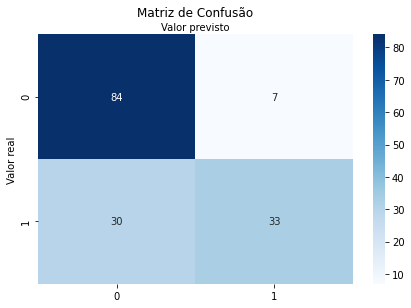

In [89]:
# Plotagem da matriz de confusão e um Heatmap

class_names=[0,1] #  Nome das classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creando o heatmap com a matriz de confusão
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor previsto')